<a href="https://colab.research.google.com/github/GokulEpiphany/thesis_temp/blob/main/Thesis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import fastai


In [54]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [23]:
!pip install fastai --upgrade

In [55]:
from fastai.tabular.all import *


In [56]:
# Goal of the below models is to build a classifier that can accurately predict the "Group the patient belongs to given the features"
# The following reads the CSV file, classifier has to find the group to which the patient data belongs to
# "GROUP" is the column to be predicted, also called dependent variable
# We will also be doing ablation study ( Keeping model and training procedure as same but change features) and report various metrics for 7 models

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('final_data_thesis.csv',header=0)

In [59]:
df.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
0,1,M,3.2,2.5,4.6,3.0,1.1,1.2,0.8,1.0,65,35,44,62,18,0.59,36,MILD,NO,MILD,NIL,MILD,NIL,NIL,400,13,0.0,12.3,12.5,256000,53.6,4.3,0.0,23.6,7.1,141,4.1,120,70,112,NO,YES,YES,YES,YES,NO,NO,YES,NO,NO,14.0,GROUP I (PHARYNGITIS)
1,10,M,3.0,2.5,4.4,2.4,1.0,1.3,1.0,1.5,63,33,67,89,21,0.45,34,NIL,NO,NIL,TRIVIAL,TRIVIAL,NIL,NIL,400,19,0.0,12.7,12.9,265000,43.5,1.3,0.9,26.0,2.5,139,3.5,120,60,65,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,6.5,GROUP I (PHARYNGITIS)
2,4,M,3.4,2.7,4.3,2.8,1.0,1.1,1.1,1.2,63,33,54,52,19,0.47,34,NIL,NO,TRIVIAL,NIL,NIL,NIL,NIL,0,55,11.0,13.5,12.0,365000,58.9,1.0,0.3,21.0,5.0,140,3.5,130,70,61,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,3.6,GROUP I (PHARYNGITIS)
3,11,M,3.1,2.4,3.5,2.4,1.0,1.2,1.0,1.2,60,30,33,52,19,0.57,42,MILD,NO,NIL,NIL,TRIVIAL,NIL,NIL,800,33,0.0,13.2,13.0,345000,52.6,2.8,1.0,20.0,6.3,136,4.0,120,80,58,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,15.2,GROUP I (PHARYNGITIS)
4,27,M,3.6,2.9,4.2,3.4,1.1,1.3,1.0,1.1,58,29,60,106,46,0.52,37,MILD,NO,MILD,NIL,MILD,NIL,NIL,400,20,0.0,12.9,13.4,296000,60.0,1.0,0.6,41.6,4.3,140,3.5,120,70,109,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,14.6,GROUP I (PHARYNGITIS)


In [60]:
df.columns

Index(['AGE', 'GENDER', 'LA', 'AO', 'LVIDd', 'LVIDs', 'LVPWd', 'LVPWs',
       'IVSDd', 'IVSDs', 'EF', 'FS', 'SV', 'EDV', 'ESV', 'RWT', 'PASP', 'PAH',
       'CONC', 'MR', 'AR', 'TR', 'PR', 'PE', 'ASO', 'ESR', 'CRP', 'HEMOGLOBIN',
       'RED BLOOD CELL DISTRIBUTION WIDTH', 'PLATELETS', 'NEUTROPHIL',
       'EOSINOPHIL', 'BASOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'SODIUM',
       'POTASSIUM', 'SYSTOLE', 'DIASTOLE', 'HR', 'DOE I - II', 'DOE III - IV',
       'FEVER', 'COLD & COUGH', 'SORETHROAT', 'CHEST PAIN', 'JOINT PAIN',
       'PALPITATION', 'GIDDINESS', 'PEDAL EDMA', 'sST2', 'GROUP'],
      dtype='object')

In [61]:
len(df.columns)

52

In [62]:
dependant_variable = 'GROUP'

In [63]:
#We have to shuffle rows to generate train and test data
df = df.reindex(np.random.permutation(df.index))

In [64]:
df.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
271,63,M,3.0,2.5,4.5,3.2,1.1,1.4,1.0,1.4,56,29,59,92,41,0.49,30,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,0,0,0.0,14.1,10.9,251000,55.0,5.0,0.2,21.0,9.0,139,3.9,120,70,68,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,7.5,GROUP IV (CONTROL)
46,13,M,3.0,2.8,4.1,3.1,1.1,1.3,1.1,1.3,60,30,34,72,39,0.54,29,NIL,NO,NIL,NIL,NIL,NIL,NIL,800,40,23.4,12.5,12.0,372000,69.0,15.3,0.6,38.0,3.1,136,4.0,100,60,68,NO,YES,YES,NO,YES,YES,NO,NO,NO,NO,15.3,GROUP I (PHARYNGITIS)
167,62,M,3.4,2.9,4.7,3.3,1.2,1.3,1.2,1.5,56,29,56,101,50,0.51,48,MILD,YES,MILD,MODERATE,MILD,NIL,NIL,0,0,0.0,12.6,16.4,499000,93.2,10.4,0.5,23.6,6.2,142,4.0,110,60,66,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,23.5,GROUP III (RHD)
42,36,F,3.0,2.6,4.4,3.0,1.1,1.3,1.0,1.2,58,31,51,87,36,0.50,22,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,0,39,0.0,12.5,12.1,468000,79.3,1.8,0.1,28.0,8.0,140,3.9,110,70,65,NO,YES,YES,YES,YES,YES,YES,NO,NO,NO,15.1,GROUP I (PHARYNGITIS)
350,41,M,3.3,3.1,4.7,2.9,1.1,1.3,1.1,1.3,65,35,69,101,32,0.47,30,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,0,0,0.0,13.0,13.5,316000,46.8,4.6,0.8,26.1,7.1,143,3.8,100,60,70,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,10.2,GROUP IV (CONTROL)


In [65]:
df.to_csv('shuffled.csv',index=False)

In [66]:
procs = [Categorify, FillMissing]

In [67]:
#Lets do a 70-30 split (357 rows, 249 will be used for training, 108 for testing)
N = len(df)
train_n = int( 0.70 * N )
test_n = N - train_n

In [68]:
train_n,test_n

(249, 108)

In [69]:
splits= (list(range(train_n)),list(range(train_n,N)))

In [70]:
cont,cat = cont_cat_split(df, 1, dep_var=dependant_variable) # this preprocess the dataframe to find category/continous variables


In [ ]:
cont

In [ ]:
cat

In [ ]:
# On manual examination, platelets are not categorical variables, they must be continuous variable. 

In [ ]:
df.dtypes

In [ ]:
df["PLATELETS"] = df["PLATELETS"].astype(str).astype(int)

In [44]:
# seems to be an error : ValueError: invalid literal for int() with base 10: '4.12,000'
# there was an error 4.12,000 in one of the cell causing this.


In [71]:
#checking now
cont

['AGE',
 'LA',
 'AO',
 'LVIDd',
 'LVIDs',
 'LVPWd',
 'LVPWs',
 'IVSDd',
 'IVSDs',
 'EF',
 'FS',
 'SV',
 'EDV',
 'ESV',
 'RWT',
 'PASP',
 'ASO',
 'ESR',
 'CRP',
 'HEMOGLOBIN',
 'RED BLOOD CELL DISTRIBUTION WIDTH',
 'PLATELETS',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'BASOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'SODIUM',
 'POTASSIUM',
 'SYSTOLE',
 'DIASTOLE',
 'HR',
 'sST2']

In [72]:
cat

['GENDER',
 'PAH',
 'CONC',
 'MR',
 'AR',
 'TR',
 'PR',
 'PE',
 'DOE I - II',
 'DOE III - IV',
 'FEVER',
 'COLD & COUGH',
 'SORETHROAT',
 'CHEST PAIN',
 'JOINT PAIN',
 'PALPITATION',
 'GIDDINESS',
 'PEDAL EDMA']

In [73]:
df = df.fillna(0)

In [74]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)


In [75]:
len(to.train),len(to.valid)


(249, 108)

In [76]:
to.show(3)


,GENDER,PAH,CONC,MR,AR,TR,PR,PE,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,AGE,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,sST2,GROUP
271,M,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,63,3.0,2.5,4.5,3.2,1.1,1.4,1.0,1.4,56,29,59,92,41,0.49,30,0,0,0.0,14.1,10.9,251000,55.000000,5.0,0.2,21.0,9.0,139,3.9,120,70,68,7.5,GROUP IV (CONTROL)
46,M,NIL,NO,NIL,NIL,NIL,NIL,NIL,NO,YES,YES,NO,YES,YES,NO,NO,NO,NO,13,3.0,2.8,4.1,3.1,1.1,1.3,1.1,1.3,60,30,34,72,39,0.54,29,800,40,23.4,12.5,12.0,372000,69.000000,15.3,0.6,38.0,3.1,136,4.0,100,60,68,15.3,GROUP I (PHARYNGITIS)
167,M,MILD,YES,MILD,MODERATE,MILD,NIL,NIL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,62,3.4,2.9,4.7,3.3,1.2,1.3,1.2,1.5,56,29,56,101,50,0.51,48,0,0,0.0,12.6,16.4,499000,93.199997,10.4,0.5,23.6,6.2,142,4.0,110,60,66,23.5,GROUP III (RHD)


In [77]:
#Lets create a decision tree
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [128]:
#some evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

def get_metrics(m,valid_ds,true_y):
  preds = m.predict(valid_ds)
  return (accuracy_score(true_y,preds),precision_score(true_y,preds,average='macro'),recall_score(true_y,preds,average='macro'),f1_score(true_y,preds,average='macro'))
  

In [136]:
m = DecisionTreeClassifier(max_leaf_nodes=40)
m.fit(xs, y)

DecisionTreeClassifier(max_leaf_nodes=40)

In [137]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()



In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

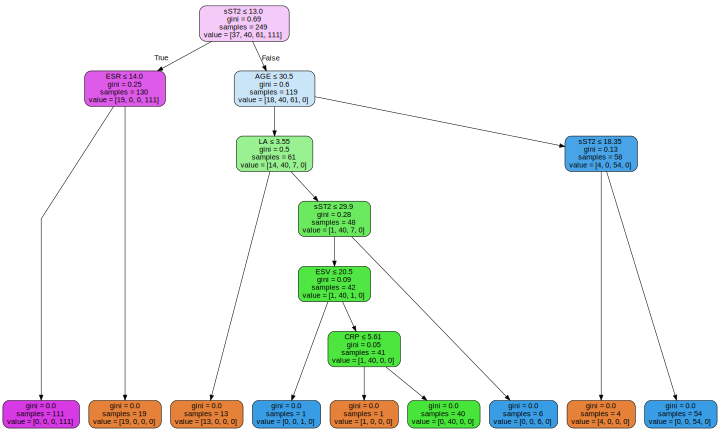

In [139]:
from fastbook import *

draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)


In [147]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)

In [148]:
(accuracy,precision,recall,f1)

(0.9722222222222222,
 0.9525142731664471,
 0.9589978734715577,
 0.9556158934477519)

In [149]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

0.9753678996809825

In [ ]:
#Gives a good accuracy, lets try with random forest. A decision tree with 40 nodes is chosen.

In [151]:
def rf(xs, y, n_estimators=40, max_samples=249,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [152]:
m = rf(xs, y);


In [153]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [154]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
50,sST2,0.365313
35,ESR,0.143576
19,LA,0.093582
18,AGE,0.074595
36,CRP,0.060739
40,NEUTROPHIL,0.059717
12,SORETHROAT,0.055326
34,ASO,0.052795
27,EF,0.020762
41,EOSINOPHIL,0.018633


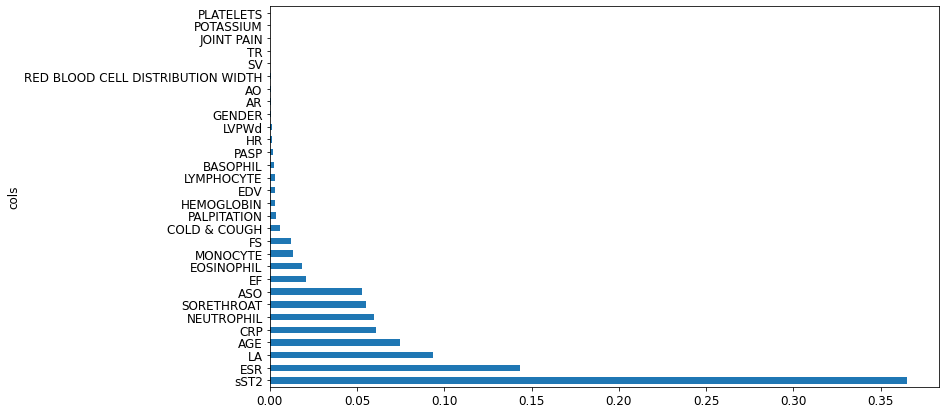

In [155]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [157]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)

In [158]:
(accuracy,precision,recall,f1)

(0.9907407407407407,
 0.9891304347826086,
 0.9956140350877193,
 0.9922320550639134)

In [ ]:
#Random forest is better and accuracy is almost perfect.

In [159]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

1.0

In [160]:
# Lets build 6 more models with different features



In [161]:
#Model 1 - Blood parameters

In [178]:
cat = []
cont = ['ASO','ESR','CRP','HEMOGLOBIN','RED BLOOD CELL DISTRIBUTION WIDTH',
        'PLATELETS',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'BASOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'SODIUM',
 'POTASSIUM']

In [179]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)


In [180]:
len(to.train),len(to.valid)


(249, 108)

In [181]:
to.show(3)


,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,GROUP
271,0,0,0.0,14.1,10.9,251000,55.000000,5.0,0.2,21.0,9.0,139,3.9,GROUP IV (CONTROL)
46,800,40,23.4,12.5,12.0,372000,69.000000,15.3,0.6,38.0,3.1,136,4.0,GROUP I (PHARYNGITIS)
167,0,0,0.0,12.6,16.4,499000,93.199997,10.4,0.5,23.6,6.2,142,4.0,GROUP III (RHD)


In [184]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [185]:
m = rf(xs, y);

In [186]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
6,NEUTROPHIL,0.262845
1,ESR,0.255100
0,ASO,0.104016
3,HEMOGLOBIN,0.102904
2,CRP,0.091378
7,EOSINOPHIL,0.058500
5,PLATELETS,0.048516
10,MONOCYTE,0.030652
9,LYMPHOCYTE,0.022281
8,BASOPHIL,0.010978


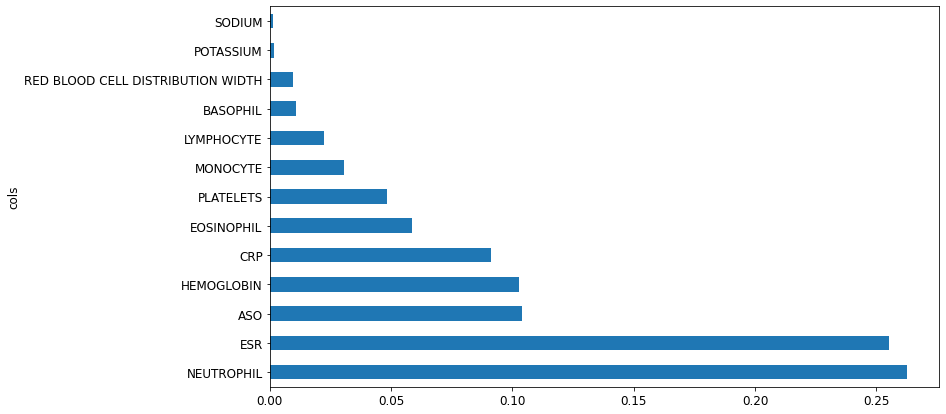

In [187]:
plot_fi(fi[:30]);

In [188]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)

In [189]:
(accuracy,precision,recall,f1)

(0.9351851851851852,
 0.9055882352941176,
 0.8971291866028709,
 0.8997632945100467)

In [190]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

0.9941358728424142

In [191]:
#Considerable drop in metrics

In [ ]:
#Model 2 - ONLY ECHO 

In [192]:
cat = ['PAH',
 'CONC',
 'MR',
 'AR',
 'TR',
 'PR',
 'PE']
cont = ['LA',
 'AO',
 'LVIDd',
 'LVIDs',
 'LVPWd',
 'LVPWs',
 'IVSDd',
 'IVSDs',
 'EF',
 'FS',
 'SV',
 'EDV',
 'ESV',
 'RWT',
 'PASP']

In [193]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)
to.show(3)


,PAH,CONC,MR,AR,TR,PR,PE,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,GROUP
271,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,3.0,2.5,4.5,3.2,1.1,1.4,1.0,1.4,56,29,59,92,41,0.49,30,GROUP IV (CONTROL)
46,NIL,NO,NIL,NIL,NIL,NIL,NIL,3.0,2.8,4.1,3.1,1.1,1.3,1.1,1.3,60,30,34,72,39,0.54,29,GROUP I (PHARYNGITIS)
167,MILD,YES,MILD,MODERATE,MILD,NIL,NIL,3.4,2.9,4.7,3.3,1.2,1.3,1.2,1.5,56,29,56,101,50,0.51,48,GROUP III (RHD)


In [194]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [195]:
m = rf(xs, y);

In [196]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
7,LA,0.358887
4,TR,0.126964
21,PASP,0.099888
15,EF,0.085006
16,FS,0.073882
2,MR,0.054514
18,EDV,0.030556
20,RWT,0.030454
17,SV,0.018566
8,AO,0.018290


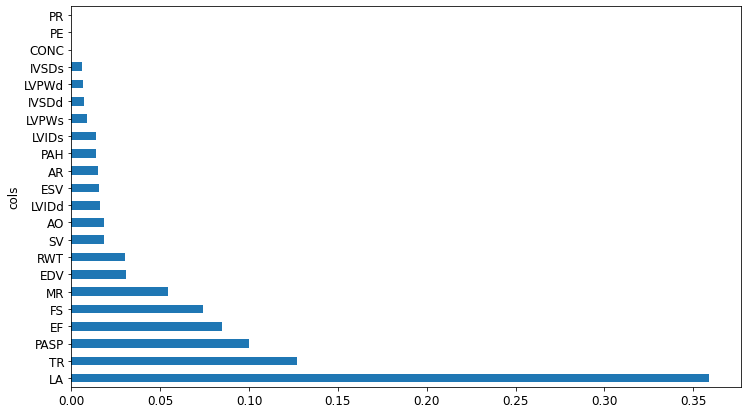

In [197]:
plot_fi(fi[:30]);

In [199]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)
(accuracy,precision,recall,f1)

(0.7777777777777778,
 0.7885416666666667,
 0.6401515151515151,
 0.6775210084033614)

In [200]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

0.918684541703506

In [201]:
# Only echo parameters gives poor result

In [202]:
#Model 3 - SYMPTOMS

In [205]:
 cont = []
 cat=['DOE I - II',
 'DOE III - IV',
 'FEVER',
 'COLD & COUGH',
 'SORETHROAT',
 'CHEST PAIN',
 'JOINT PAIN',
 'PALPITATION',
 'GIDDINESS',
 'PEDAL EDMA']

In [206]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)
to.show(3)

,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,GROUP
271,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,GROUP IV (CONTROL)
46,NO,YES,YES,NO,YES,YES,NO,NO,NO,NO,GROUP I (PHARYNGITIS)
167,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,GROUP III (RHD)


In [207]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
m = rf(xs, y);
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
4,SORETHROAT,0.323753
1,DOE III - IV,0.204651
3,COLD & COUGH,0.143201
2,FEVER,0.082568
6,JOINT PAIN,0.079746
5,CHEST PAIN,0.061846
0,DOE I - II,0.036355
7,PALPITATION,0.029437
9,PEDAL EDMA,0.025458
8,GIDDINESS,0.012986


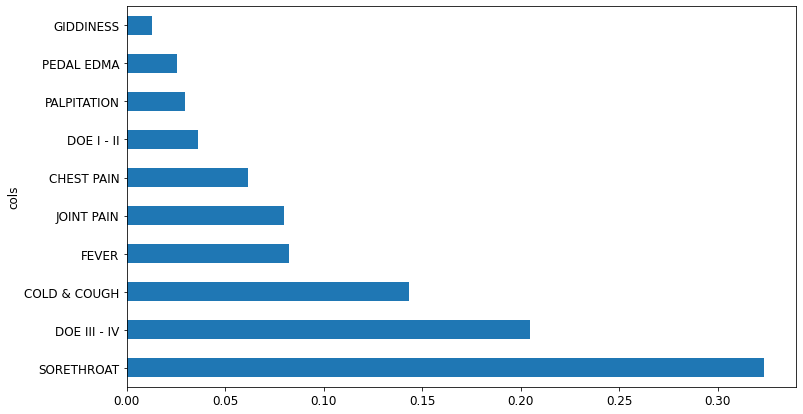

In [208]:
plot_fi(fi[:30]);

In [209]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)
(accuracy,precision,recall,f1)

(0.7592592592592593,
 0.7364583333333333,
 0.6245348219032429,
 0.6194796136205112)

In [210]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

0.9046149976577549

In [ ]:
# Again, poor results

# Model 4 - SST2 with BLOOD

In [211]:
cat = []
cont = ['ASO','ESR','CRP','HEMOGLOBIN','RED BLOOD CELL DISTRIBUTION WIDTH',
        'PLATELETS',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'BASOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'SODIUM',
 'POTASSIUM','sST2']

In [212]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)
to.show(3)

,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,sST2,GROUP
271,0,0,0.0,14.1,10.9,251000,55.000000,5.0,0.2,21.0,9.0,139,3.9,7.5,GROUP IV (CONTROL)
46,800,40,23.4,12.5,12.0,372000,69.000000,15.3,0.6,38.0,3.1,136,4.0,15.3,GROUP I (PHARYNGITIS)
167,0,0,0.0,12.6,16.4,499000,93.199997,10.4,0.5,23.6,6.2,142,4.0,23.5,GROUP III (RHD)


In [213]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
m = rf(xs, y);
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
13,sST2,0.347701
1,ESR,0.207097
6,NEUTROPHIL,0.162590
2,CRP,0.084164
3,HEMOGLOBIN,0.071370
0,ASO,0.061371
7,EOSINOPHIL,0.036731
10,MONOCYTE,0.010571
8,BASOPHIL,0.006826
4,RED BLOOD CELL DISTRIBUTION WIDTH,0.004964


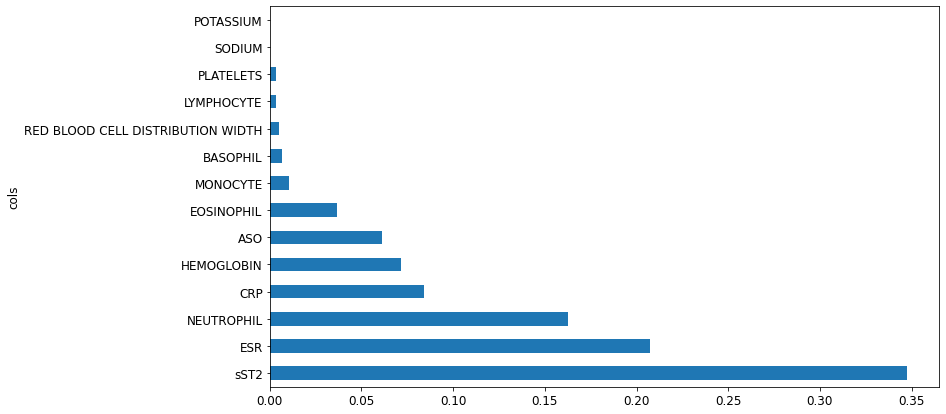

In [214]:
plot_fi(fi[:30]);

In [215]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)
(accuracy,precision,recall,f1)

(0.9629629629629629,
 0.9330808080808082,
 0.9476342371079213,
 0.9399263897147698)

In [216]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

0.9953153198787739

In [217]:
#Better results

# Model 5 - SST2 with echo

In [218]:
cat = ['PAH',
 'CONC',
 'MR',
 'AR',
 'TR',
 'PR',
 'PE']
cont = ['LA',
 'AO',
 'LVIDd',
 'LVIDs',
 'LVPWd',
 'LVPWs',
 'IVSDd',
 'IVSDs',
 'EF',
 'FS',
 'SV',
 'EDV',
 'ESV',
 'RWT',
 'PASP','sST2']

In [219]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)
to.show(3)

,PAH,CONC,MR,AR,TR,PR,PE,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,sST2,GROUP
271,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,3.0,2.5,4.5,3.2,1.1,1.4,1.0,1.4,56,29,59,92,41,0.49,30,7.5,GROUP IV (CONTROL)
46,NIL,NO,NIL,NIL,NIL,NIL,NIL,3.0,2.8,4.1,3.1,1.1,1.3,1.1,1.3,60,30,34,72,39,0.54,29,15.3,GROUP I (PHARYNGITIS)
167,MILD,YES,MILD,MODERATE,MILD,NIL,NIL,3.4,2.9,4.7,3.3,1.2,1.3,1.2,1.5,56,29,56,101,50,0.51,48,23.5,GROUP III (RHD)


In [220]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
m = rf(xs, y);
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
22,sST2,0.484786
7,LA,0.163611
15,EF,0.075973
21,PASP,0.062989
4,TR,0.062283
16,FS,0.039121
18,EDV,0.017358
19,ESV,0.013507
2,MR,0.013150
8,AO,0.011449


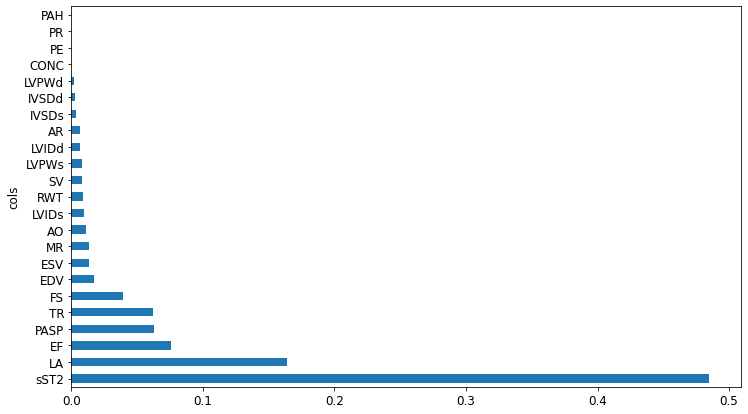

In [221]:
plot_fi(fi[:30]);

In [222]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)
(accuracy,precision,recall,f1)

(0.8518518518518519,
 0.8999999999999999,
 0.8156565656565656,
 0.8079562468484542)

In [223]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

0.9445623052635074

In [224]:
# sST2 with blood is better than sST2 with echo

# Model - 6 sST2 with Symptoms


In [225]:
 cont = ['sST2']
 cat=['DOE I - II',
 'DOE III - IV',
 'FEVER',
 'COLD & COUGH',
 'SORETHROAT',
 'CHEST PAIN',
 'JOINT PAIN',
 'PALPITATION',
 'GIDDINESS',
 'PEDAL EDMA']

In [226]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)
to.show(3)

,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
271,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,7.5,GROUP IV (CONTROL)
46,NO,YES,YES,NO,YES,YES,NO,NO,NO,NO,15.3,GROUP I (PHARYNGITIS)
167,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,23.5,GROUP III (RHD)


In [227]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
m = rf(xs, y);
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
10,sST2,0.619168
4,SORETHROAT,0.158529
6,JOINT PAIN,0.068261
3,COLD & COUGH,0.050618
1,DOE III - IV,0.049923
2,FEVER,0.027313
7,PALPITATION,0.008144
5,CHEST PAIN,0.006676
0,DOE I - II,0.006155
9,PEDAL EDMA,0.005133


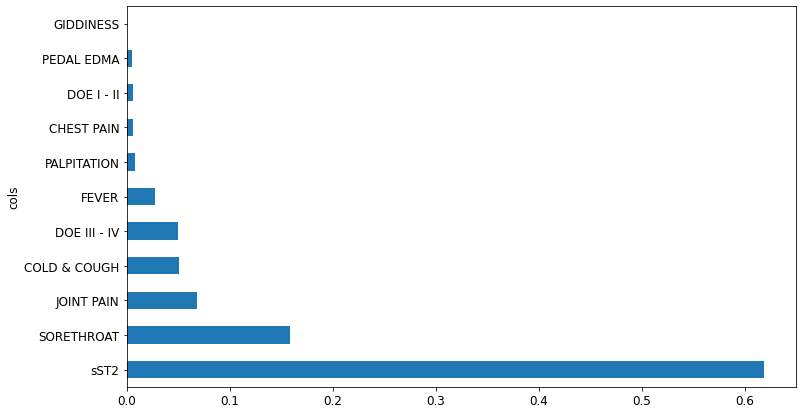

In [228]:
plot_fi(fi[:30]);

In [229]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)
(accuracy,precision,recall,f1)

(0.9074074074074074, 0.8616452991452992, 0.893474215842637, 0.8751565062270088)

In [230]:
preds = m.predict_proba(valid_xs)
true_y = valid_y
roc_auc_score(true_y,preds,multi_class='ovr')

0.9882696879797449

In [231]:

# Lets plot all 7 models results

import matplotlib.pyplot as plt

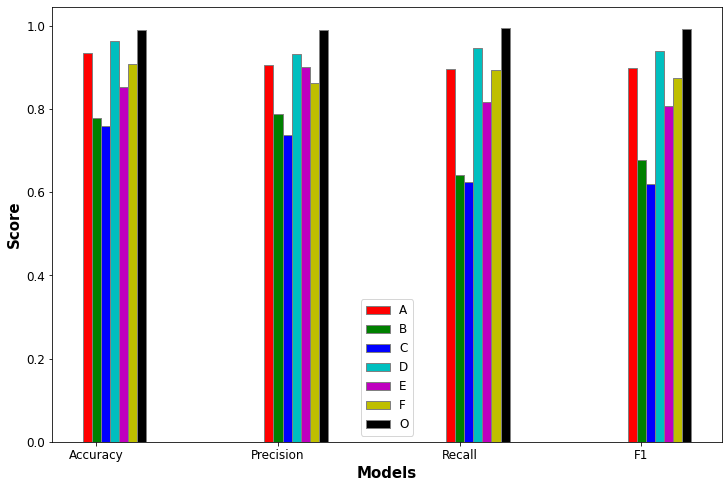

In [237]:
barWidth = 0.05
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
A = [0.9351851851851852, 0.9055882352941176, 0.8971291866028709, 0.8997632945100467]
B = [0.7777777777777778, 0.7885416666666667, 0.6401515151515151, 0.6775210084033614]
C = [0.7592592592592593, 0.7364583333333333, 0.6245348219032429, 0.6194796136205112]
D = [0.9629629629629629, 0.9330808080808082, 0.9476342371079213, 0.9399263897147698]
E = [0.8518518518518519, 0.8999999999999999, 0.8156565656565656, 0.8079562468484542]
F = [0.9074074074074074, 0.8616452991452992, 0.893474215842637, 0.8751565062270088]
O = [0.9907407407407407, 0.9891304347826086, 0.9956140350877193, 0.9922320550639134]
 
# Set position of bar on X axis
br1 = np.arange(len(A))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
 
# Make the plot
plt.bar(br1, A, color ='r', width = barWidth,
        edgecolor ='grey', label ='A')
plt.bar(br2, B, color ='g', width = barWidth,
        edgecolor ='grey', label ='B')
plt.bar(br3, C, color ='b', width = barWidth,
        edgecolor ='grey', label ='C')
plt.bar(br4, D, color ='c', width = barWidth,
        edgecolor ='grey', label ='D')
plt.bar(br5, E, color ='m', width = barWidth,
        edgecolor ='grey', label ='E')
plt.bar(br6, F, color ='y', width = barWidth,
        edgecolor ='grey', label ='F')
plt.bar(br7, O, color ='k', width = barWidth,
        edgecolor ='grey', label ='O')

 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(A))],
        ['Accuracy','Precision','Recall','F1'])
 
plt.legend()
plt.show()

In [ ]:
Model C is the poorest (Only symptoms), Model O is the best (all features), Model D is reasonable